# Perdidos en el espacio

Imagina que en el futuro una nave espacial tripulada parte de la Tierra hacia el planeta Neptuno.

Durante el viaje, la tripulación permanece en estado de animación suspendida. En el trayecto la nave
sufre una grave avería y el sistema automático de control la dirige al cuerpo celeste más cercano,
donde realiza un aterrizaje de emergencia. Al posarse sobre la superficie, el sistema de soporte vital
de la nave reanima a la tripulación.

Una vez despiertos, los tripulantes descubren que el sistema de posicionamiento espacial no
funciona y por el momento no tienen comunicación con la Tierra ni pueden mirar al exterior de la
nave por razones de seguridad. Así que no saben dónde están, no tienen ningún dato del exterior,
ni posibilidad de conseguirlo, ni saben cuánto tiempo ha pasado.

En su trayecto entre la Tierra y Neptuno han podido estar cerca de la propia Tierra, Marte, Júpiter,
Saturno, Urano, Neptuno y las lunas de cualquiera de ellos

In [93]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from faker import Faker
from sklearn.preprocessing import LabelEncoder
from plotly.subplots import make_subplots

In [94]:
data = {'Planeta': ['Tierra', 'Marte', 'Júpiter', 'Saturno', 'Urano', 'Neptuno'],
        'g (m/s²)': [9.8, 3.7, 24.8, 9.0, 8.7, 11.0]}

df = pd.DataFrame(data)

print(df)

   Planeta  g (m/s²)
0   Tierra       9.8
1    Marte       3.7
2  Júpiter      24.8
3  Saturno       9.0
4    Urano       8.7
5  Neptuno      11.0


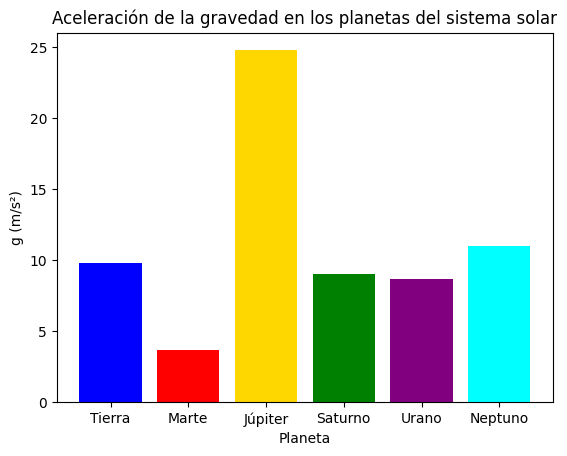

In [95]:
colors = ['blue', 'red', 'gold', 'green', 'purple', 'cyan']

fig, ax = plt.subplots()
ax.bar(df['Planeta'], df['g (m/s²)'], color=colors)  

ax.set_xlabel('Planeta')
ax.set_ylabel('g (m/s²)')
ax.set_title('Aceleración de la gravedad en los planetas del sistema solar')

plt.show()

# Datos Experimentales


In [96]:
fake = Faker()

planet_g_values = {
    'Tierra': 9.8,
    'Marte': 3.7,
    'Júpiter': 24.8,
    'Saturno': 9.0,
    'Urano': 8.7,
    'Neptuno': 11.0
}

def generate_sample():
    L = round(random.uniform(0.8, 2.5), 2)
    t = round(random.uniform(0.4, 0.7), 2)
    g_calculated = round((2 * L) / (t**2), 2)
    
    g_diffs = {planet: abs(g_calculated - g) for planet, g in planet_g_values.items()}
 
    sorted_planets = sorted(g_diffs.keys(), key=lambda x: g_diffs[x])
    
    top_3_planets = sorted_planets[:3]

    return {
        "ID": fake.uuid4(),
        "Longitud (m)": L,
        "Tiempo (s)": t,
        "g_calculado (m/s²)": g_calculated,
        "Planeta más probable": top_3_planets[0],
        "2do más probable": top_3_planets[1],
        "3ro más probable": top_3_planets[2]
    }

dataset = [generate_sample() for _ in range(500)]

for sample in dataset:
    print(sample)


{'ID': '98318b7d-01a9-472c-8e2c-8bede3d37b17', 'Longitud (m)': 1.72, 'Tiempo (s)': 0.52, 'g_calculado (m/s²)': 12.72, 'Planeta más probable': 'Neptuno', '2do más probable': 'Tierra', '3ro más probable': 'Saturno'}
{'ID': '262b9cb7-6ef1-4f88-9c06-d09466986439', 'Longitud (m)': 1.81, 'Tiempo (s)': 0.57, 'g_calculado (m/s²)': 11.14, 'Planeta más probable': 'Neptuno', '2do más probable': 'Tierra', '3ro más probable': 'Saturno'}
{'ID': '05f14503-d339-488e-8fa8-05a550e31be2', 'Longitud (m)': 1.77, 'Tiempo (s)': 0.53, 'g_calculado (m/s²)': 12.6, 'Planeta más probable': 'Neptuno', '2do más probable': 'Tierra', '3ro más probable': 'Saturno'}
{'ID': 'ab7610f6-8ee3-470e-92a7-2f8fe23b74de', 'Longitud (m)': 1.95, 'Tiempo (s)': 0.45, 'g_calculado (m/s²)': 19.26, 'Planeta más probable': 'Júpiter', '2do más probable': 'Neptuno', '3ro más probable': 'Tierra'}
{'ID': 'fcf095ee-b2b6-47cb-8b58-2a8d51d9cf81', 'Longitud (m)': 2.02, 'Tiempo (s)': 0.58, 'g_calculado (m/s²)': 12.01, 'Planeta más probable': 'Ne

In [97]:
csv_filename = "planet_dataset.csv"
df = pd.DataFrame(dataset)
df.to_csv(csv_filename, index=False)

In [98]:
filepath = "planet_dataset.csv"
data_frame = pd.read_csv(filepath)

data_frame.head(500)

,ID,Longitud (m),Tiempo (s),g_calculado (m/s²),Planeta más probable,2do más probable,3ro más probable
0,98318b7d-01a9-472c-8e2c-8bede3d37b17,1.72,0.52,12.72,Neptuno,Tierra,Saturno
1,262b9cb7-6ef1-4f88-9c06-d09466986439,1.81,0.57,11.14,Neptuno,Tierra,Saturno
2,05f14503-d339-488e-8fa8-05a550e31be2,1.77,0.53,12.60,Neptuno,Tierra,Saturno
3,ab7610f6-8ee3-470e-92a7-2f8fe23b74de,1.95,0.45,19.26,Júpiter,Neptuno,Tierra
4,fcf095ee-b2b6-47cb-8b58-2a8d51d9cf81,2.02,0.58,12.01,Neptuno,Tierra,Saturno
...,...,...,...,...,...,...,...
495,3498f741-833e-4118-a1ea-55197aa578e6,0.81,0.63,4.08,Marte,Urano,Saturno
496,d8b80884-595c-4b50-8428-e8ddc7dfdb48,2.42,0.50,19.36,Júpiter,Neptuno,Tierra
497,140b35f8-9961-42ba-84f1-d8e08b7a91ac,1.28,0.49,10.66,Neptuno,Tierra,Saturno
498,26bd78de-fc58-4926-bf15-9a7def4e402a,1.91,0.44,19.73,Júpiter,Neptuno,Tierra


# Fórmula: L = 1/2 x g x t^2

    A.- Con una longitud L= 1.00 m cronometran t = 0.46 s.

    ¿Cuánto vale g y su error?
 
    ¿En qué planeta están, o pueden estar?

In [99]:
L = 1.00  # m
t = 0.46  # s
delta_L = 0.01  # m
delta_t = 0.01  # s

g = 2 * L / t**2

dg_dL = 2 / t**2
dg_dt = -4 * L / t**3

delta_g = np.sqrt((dg_dL * delta_L)**2 + (dg_dt * delta_t)**2)

g, delta_g

df = pd.DataFrame({'Aceleración de la gravedad medida (g)': [g],
                   'Error en la medición de g': [delta_g]})

print(df)

   Aceleración de la gravedad medida (g)  Error en la medición de g
0                               9.451796                   0.421677


Dado que g = 9.45 m/s^2 + - 0.42 m/s², podemos calcular el rango de valores posibles para g:

Rango inferior: 9.45 - 0.42 = 9.03 m/s^2

Rango superior: 9.45 + 0.42 = 9.87 m/s^2

Teniendo en cuenta los datos de la tabla, podemos saber que la tripulación podría estar en:

Saturno (g = 9.0 m/s^2) ya que 9.0 está dentro del rango de 9.03 a 9.87 m/s^2.

Tierra (g = 9.8 m/s^2) ya que 9.8 también está dentro del rango de 9.03 a 9.87 m/s^2.

    B.- Con una longitud L=2.00 m cronometran t = 0.66 s.

    ¿Cuánto vale g y su error?

    ¿En qué planeta están, o pueden estar?
 
    ¿Con que probabilidad puedes afirmarlo?

In [100]:
L = 2.00  # m
t = 0.66  # s

g = 2 * L / t**2

dg_dL = 2 / t**2
dg_dt = -4 * L / t**3

delta_g = np.sqrt((dg_dL * delta_L)**2 + (dg_dt * delta_t)**2)

g, delta_g

df = pd.DataFrame({'Aceleración de la gravedad medida (g)': [g],
                   'Error en la medición de g': [delta_g]})

print(df)

   Aceleración de la gravedad medida (g)  Error en la medición de g
0                               9.182736                   0.282027


Ahora, podemos calcular el rango de valores posibles para g:

Rango inferior: 9.18 - 0.28 = 8.90 m/s^2
Rango superior: 9.18 + 0.28 = 9.46 m/s^2

Podemos concluir que la tripulación podría estar en:

Saturno (g = 9.0 m/s^2) ya que 9.0 está dentro del rango de 8.90 a 9.46 m/s^2.
Dado que solo Saturno se encuentra dentro del rango calculado, podemos afirmar con cierta confianza que la tripulación está en Saturno en este caso.

# Creación de un Dataset enfocado en Experimentos de Aceleración de Gravedad para determinar la ubicación de una nave espacial en Tierra o Saturno 

Ahora vamos a crear un dataset enfocado en los experimentos realizados en los planetas con mayores porcentajes de posibilidad de estar presentes. Estos experimentos se centran en la Tierra y Saturno, ya que, según los cálculos previos, estos dos planetas mostraron los valores de aceleración de la gravedad más cercanos a los obtenidos en los escenarios analizados.

Este dataset contendrá los datos de las longitudes y tiempos cronometrados de cada experimento, así como los valores de la aceleración de la gravedad calculados y los porcentajes de acierto para cada planeta. Al analizar estos datos, podremos obtener una mejor comprensión de las posibilidades de que la nave espacial se encuentre en la Tierra o en Saturno, y así tomar decisiones más informadas sobre cómo proceder en esta situación.

Al utilizar este enfoque centrado en los planetas con mayores probabilidades, esperamos que podamos obtener resultados más precisos y útiles para determinar la ubicación de la nave espacial y garantizar el éxito de la misión.

In [101]:
fake = Faker()

def generate_sample():
    L = round(random.uniform(0.8, 2.5), 2)
    t = round(random.uniform(0.4, 0.7), 2)
    g_calculated = round((2 * L) / (t**2), 2)
    most_probable_planet = "Tierra" if abs(g_calculated - 9.8) < abs(g_calculated - 9.0) else "Saturno"
    second_most_probable_planet = "Saturno" if most_probable_planet == "Tierra" else "Tierra"
    
    return {
        "ID": fake.uuid4(),
        "Longitud (m)": L,
        "Tiempo (s)": t,
        "g_calculado (m/s²)": g_calculated,
        "Planeta más probable": most_probable_planet,
        "2do más probable": second_most_probable_planet
    }

dataset = [generate_sample() for _ in range(100)]

for sample in dataset:
    print(sample)

{'ID': '3f951f19-e587-4179-967b-996b2a5ecd05', 'Longitud (m)': 1.82, 'Tiempo (s)': 0.58, 'g_calculado (m/s²)': 10.82, 'Planeta más probable': 'Tierra', '2do más probable': 'Saturno'}
{'ID': 'bbef94f9-4385-4854-b4c8-944b515cec81', 'Longitud (m)': 2.28, 'Tiempo (s)': 0.45, 'g_calculado (m/s²)': 22.52, 'Planeta más probable': 'Tierra', '2do más probable': 'Saturno'}
{'ID': '1404614f-afb7-43e4-b562-213730f83688', 'Longitud (m)': 2.23, 'Tiempo (s)': 0.46, 'g_calculado (m/s²)': 21.08, 'Planeta más probable': 'Tierra', '2do más probable': 'Saturno'}
{'ID': '7ed6f1a2-7e05-4d69-b1c7-40578ed59cf9', 'Longitud (m)': 1.51, 'Tiempo (s)': 0.62, 'g_calculado (m/s²)': 7.86, 'Planeta más probable': 'Saturno', '2do más probable': 'Tierra'}
{'ID': '2008c9c8-f060-4e99-bd4a-af2d59db72a5', 'Longitud (m)': 1.38, 'Tiempo (s)': 0.59, 'g_calculado (m/s²)': 7.93, 'Planeta más probable': 'Saturno', '2do más probable': 'Tierra'}
{'ID': '254b90b5-1682-4c21-9de1-78313fb7f893', 'Longitud (m)': 2.4, 'Tiempo (s)': 0.54,

In [102]:
data_frame = pd.DataFrame(dataset)
data_frame.to_csv("generated_dataset.csv", index=False)


In [103]:
filepath = "generated_dataset.csv"
data_frame = pd.read_csv(filepath)

data_frame.head(100)


,ID,Longitud (m),Tiempo (s),g_calculado (m/s²),Planeta más probable,2do más probable
0,3f951f19-e587-4179-967b-996b2a5ecd05,1.82,0.58,10.82,Tierra,Saturno
1,bbef94f9-4385-4854-b4c8-944b515cec81,2.28,0.45,22.52,Tierra,Saturno
2,1404614f-afb7-43e4-b562-213730f83688,2.23,0.46,21.08,Tierra,Saturno
3,7ed6f1a2-7e05-4d69-b1c7-40578ed59cf9,1.51,0.62,7.86,Saturno,Tierra
4,2008c9c8-f060-4e99-bd4a-af2d59db72a5,1.38,0.59,7.93,Saturno,Tierra
...,...,...,...,...,...,...
95,bee7ecbb-ea97-4ee6-af4f-cb555873244f,2.28,0.62,11.86,Tierra,Saturno
96,71892b21-2255-46e2-b82c-14e202d38263,1.15,0.44,11.88,Tierra,Saturno
97,517a6873-c3a5-4554-9ff5-547bf58f29d9,1.43,0.65,6.77,Saturno,Tierra
98,4a79618c-c972-460e-91f7-3bd8aa36baa1,1.23,0.46,11.63,Tierra,Saturno


# Análisis Exploratorio de Datos para el experimento de Tierra y Saturno como pruebas para determinar la ubicación de la nave espacial

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [105]:
filepath = "generated_dataset.csv"
data_frame = pd.read_csv(filepath)

In [106]:
data_frame.info()
print(data_frame.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    100 non-null    object 
 1   Longitud (m)          100 non-null    float64
 2   Tiempo (s)            100 non-null    float64
 3   g_calculado (m/s²)    100 non-null    float64
 4   Planeta más probable  100 non-null    object 
 5   2do más probable      100 non-null    object 
dtypes: float64(3), object(3)
memory usage: 4.8+ KB
       Longitud (m)  Tiempo (s)  g_calculado (m/s²)
count    100.000000  100.000000          100.000000
mean       1.615100    0.555100           11.376300
std        0.495787    0.086963            5.312521
min        0.820000    0.410000            3.760000
25%        1.185000    0.480000            7.267500
50%        1.605000    0.550000            9.965000
75%        2.072500    0.622500           14.637500
max        2.490000  

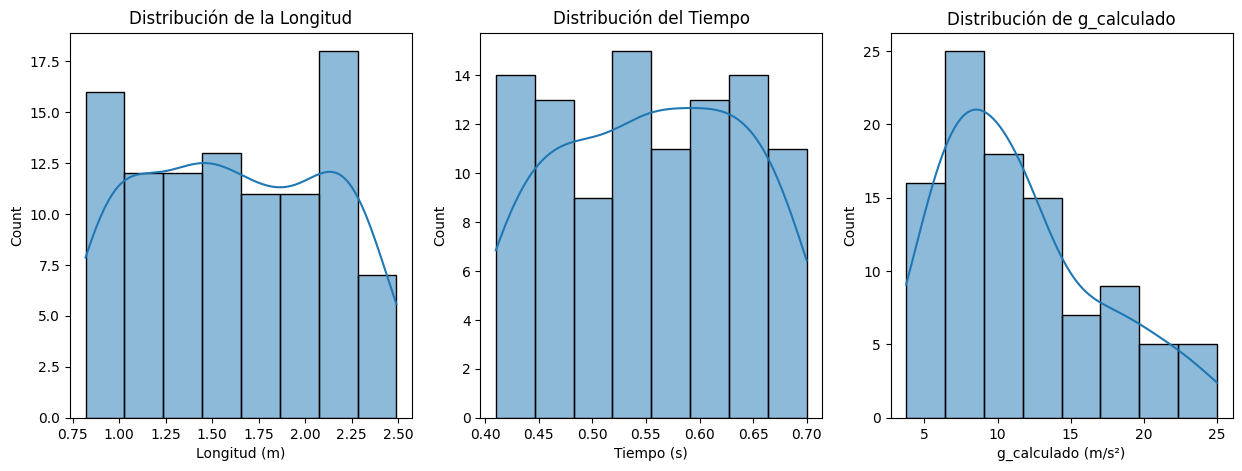

In [107]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data_frame['Longitud (m)'], ax=ax[0], kde=True)
ax[0].set_title('Distribución de la Longitud')

sns.histplot(data_frame['Tiempo (s)'], ax=ax[1], kde=True)
ax[1].set_title('Distribución del Tiempo')

sns.histplot(data_frame['g_calculado (m/s²)'], ax=ax[2], kde=True)
ax[2].set_title('Distribución de g_calculado')

plt.show()

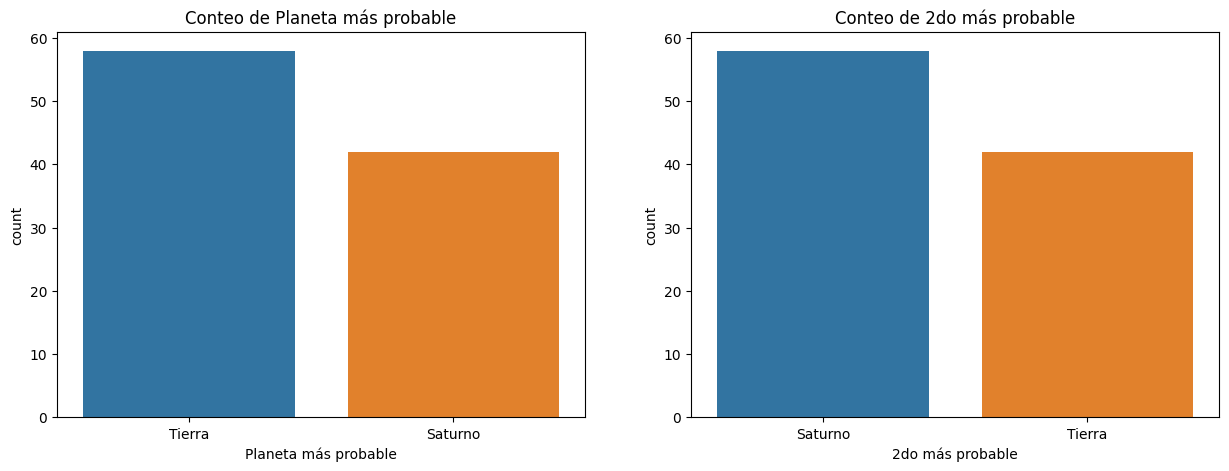

In [108]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x=data_frame['Planeta más probable'], ax=ax[0])
ax[0].set_title('Conteo de Planeta más probable')

sns.countplot(x=data_frame['2do más probable'], ax=ax[1])
ax[1].set_title('Conteo de 2do más probable')

plt.show()


In [109]:
import plotly.io as pio

def remove_spaces_from_columns(df):
    return df.rename(columns=lambda x: x.replace(" ", "_"))

data_frame_no_spaces = remove_spaces_from_columns(data_frame)

fig = px.scatter_matrix(data_frame_no_spaces, dimensions=['Longitud_(m)', 'Tiempo_(s)', 'g_calculado_(m/s²)'], color="Planeta_más_probable")

pio.write_html(fig, file='scatter_matrix.html', auto_open=True)

In [110]:
def remove_spaces_from_columns(df):
    return df.rename(columns=lambda x: x.replace(" ", "_"))

data_frame_no_spaces = remove_spaces_from_columns(data_frame)

fig1 = px.box(data_frame_no_spaces, x="Planeta_más_probable", y="g_calculado_(m/s²)", points="all")
pio.write_html(fig1, file='box_plot1.html', auto_open=True)

fig2 = px.box(data_frame_no_spaces, x="2do_más_probable", y="g_calculado_(m/s²)", points="all")
pio.write_html(fig2, file='box_plot2.html', auto_open=True)